<a href="https://colab.research.google.com/github/Midhun-c/DWDM-lab/blob/main/ex_4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
install.packages("randomForest")
library(randomForest)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
install.packages("datasets")
library(datasets)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [22]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



In [23]:
data<-iris
str(data)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [24]:
data$Species <- as.factor(data$Species)
table(data$Species)



    setosa versicolor  virginica 
        50         50         50 

In [25]:
set.seed(222)
ind <- sample(2, nrow(data), replace = TRUE, prob = c(0.7, 0.3))
train <- data[ind==1,]
test <- data[ind==2,]

In [26]:
rf <- randomForest(Species~., data=train, proximity=TRUE)
print(rf)



Call:
 randomForest(formula = Species ~ ., data = train, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.95%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         32          0         0  0.00000000
versicolor      0         33         2  0.05714286
virginica       0          3        31  0.08823529


**Train data accuracy is 100% that indicates all the values classified correctly.bold text**

In [28]:
p1 <- predict(rf, train)
confusionMatrix(p1, train$ Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         32          0         0
  versicolor      0         35         0
  virginica       0          0        34

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9641, 1)
    No Information Rate : 0.3465     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3168            

**Test data accuracy is 90%**

In [29]:
p2 <- predict(rf, test)
confusionMatrix(p2, test$ Species)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         18          0         0
  versicolor      0         15         3
  virginica       0          0        13

Overall Statistics
                                          
               Accuracy : 0.9388          
                 95% CI : (0.8313, 0.9872)
    No Information Rate : 0.3673          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9081          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.8125
Specificity                 1.0000            0.9118           1.0000
Pos Pred Value              1.0000            0.8333           1.0000
Neg Pred Value              1.0000            1.0000           0.9167
P

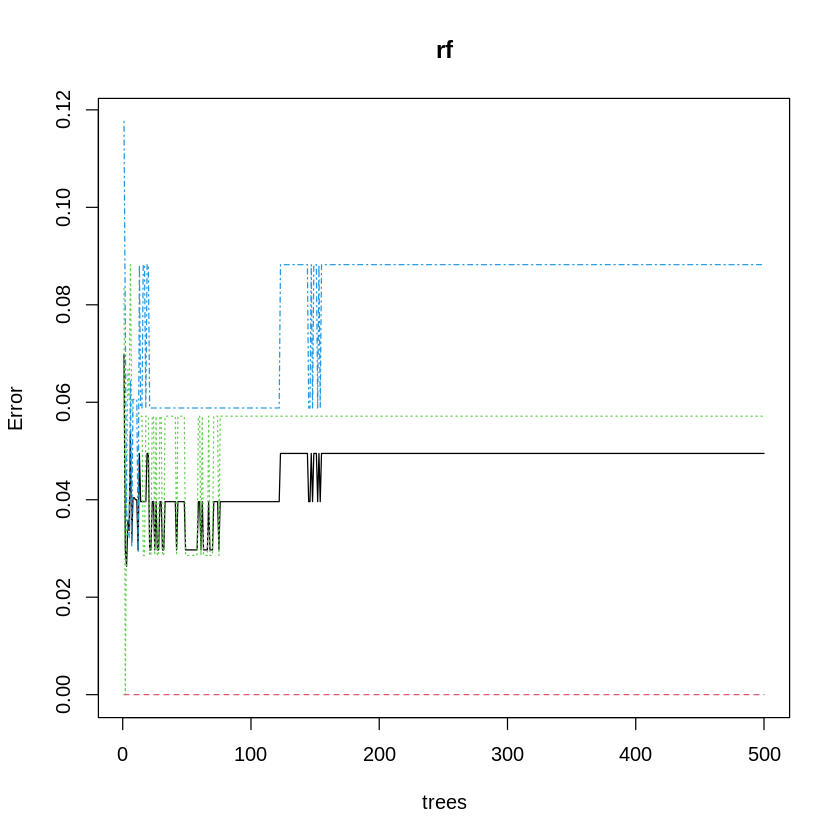

In [30]:
plot(rf)